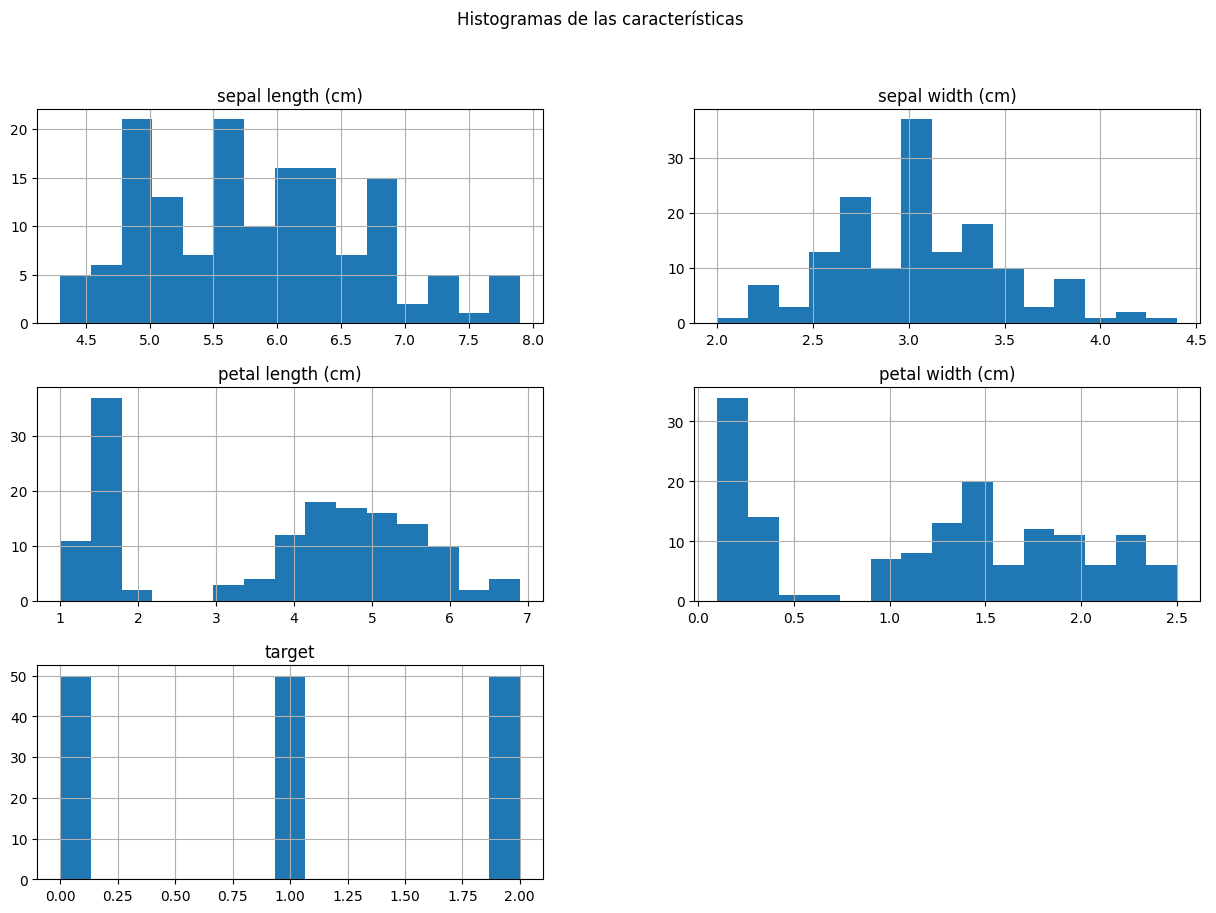

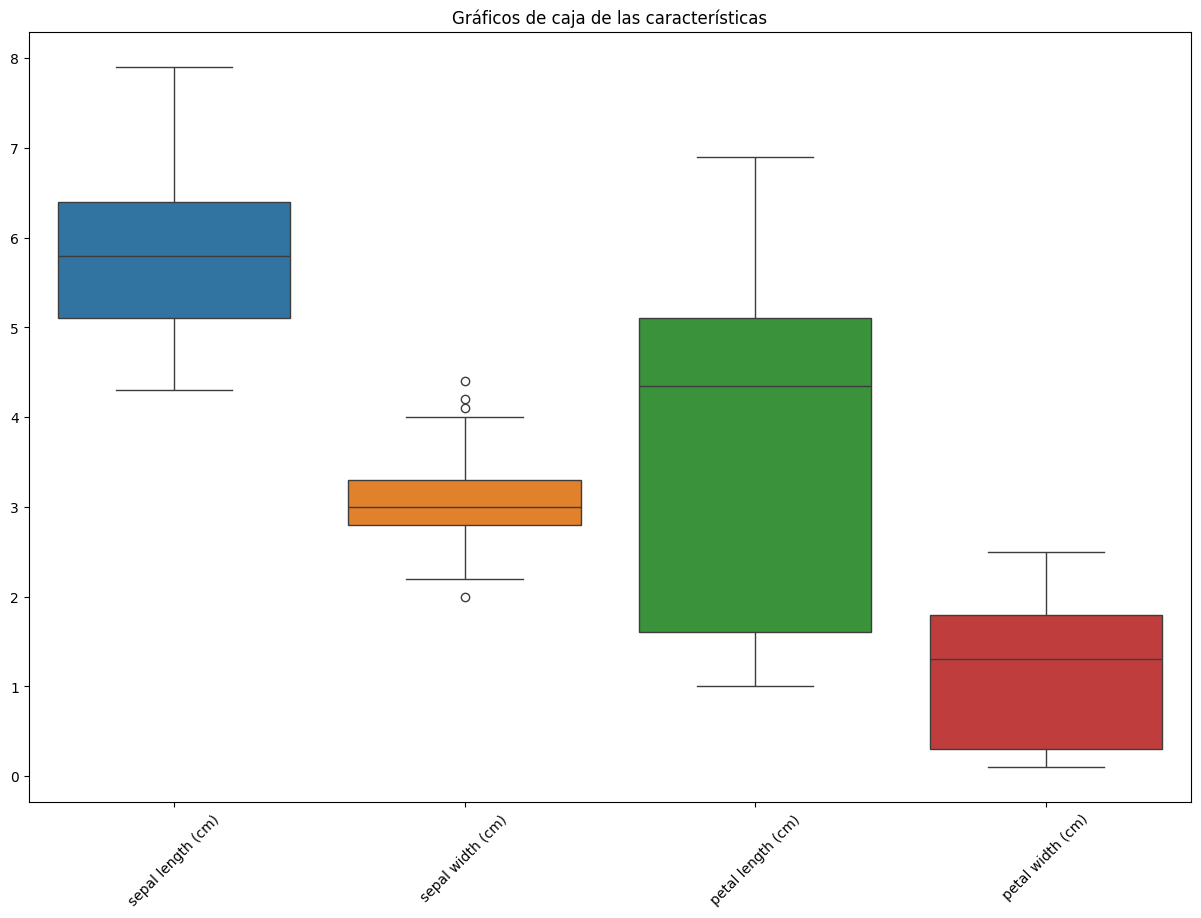

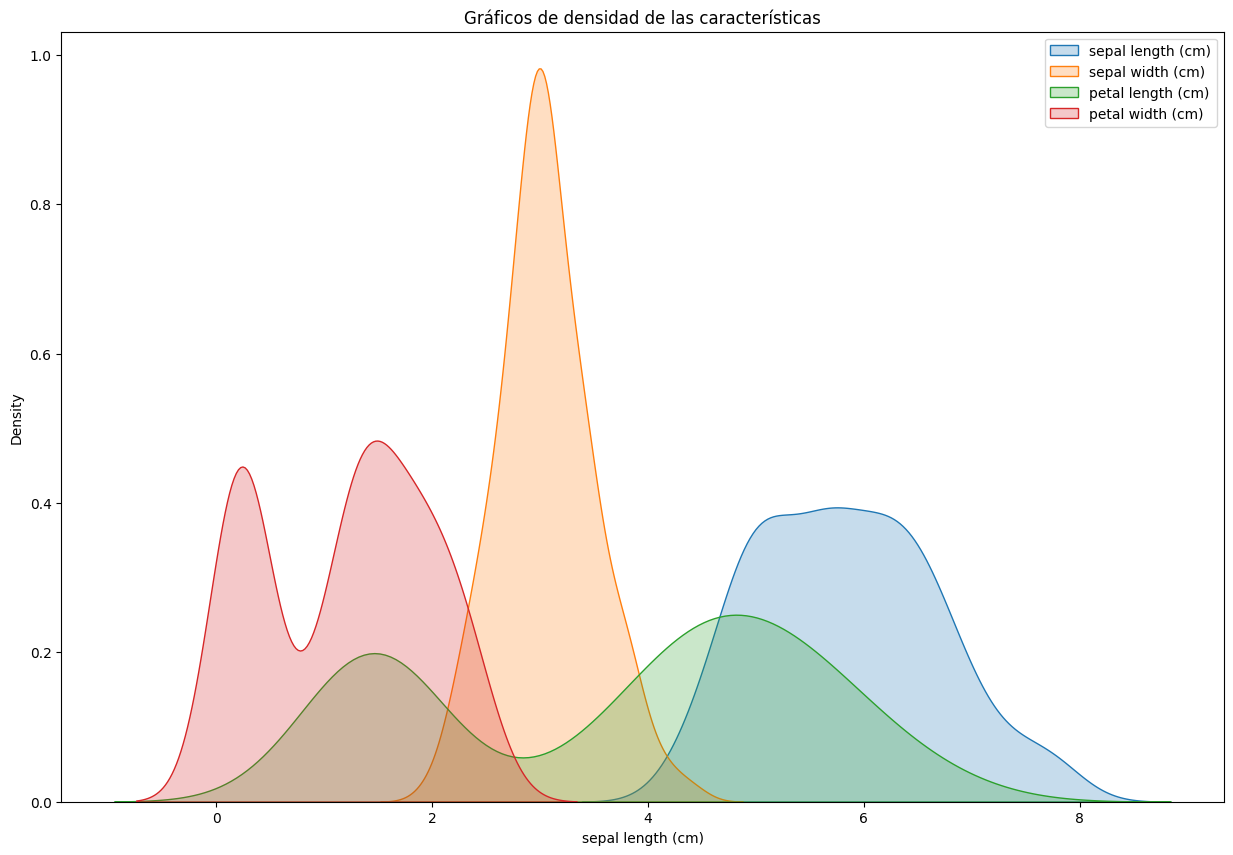

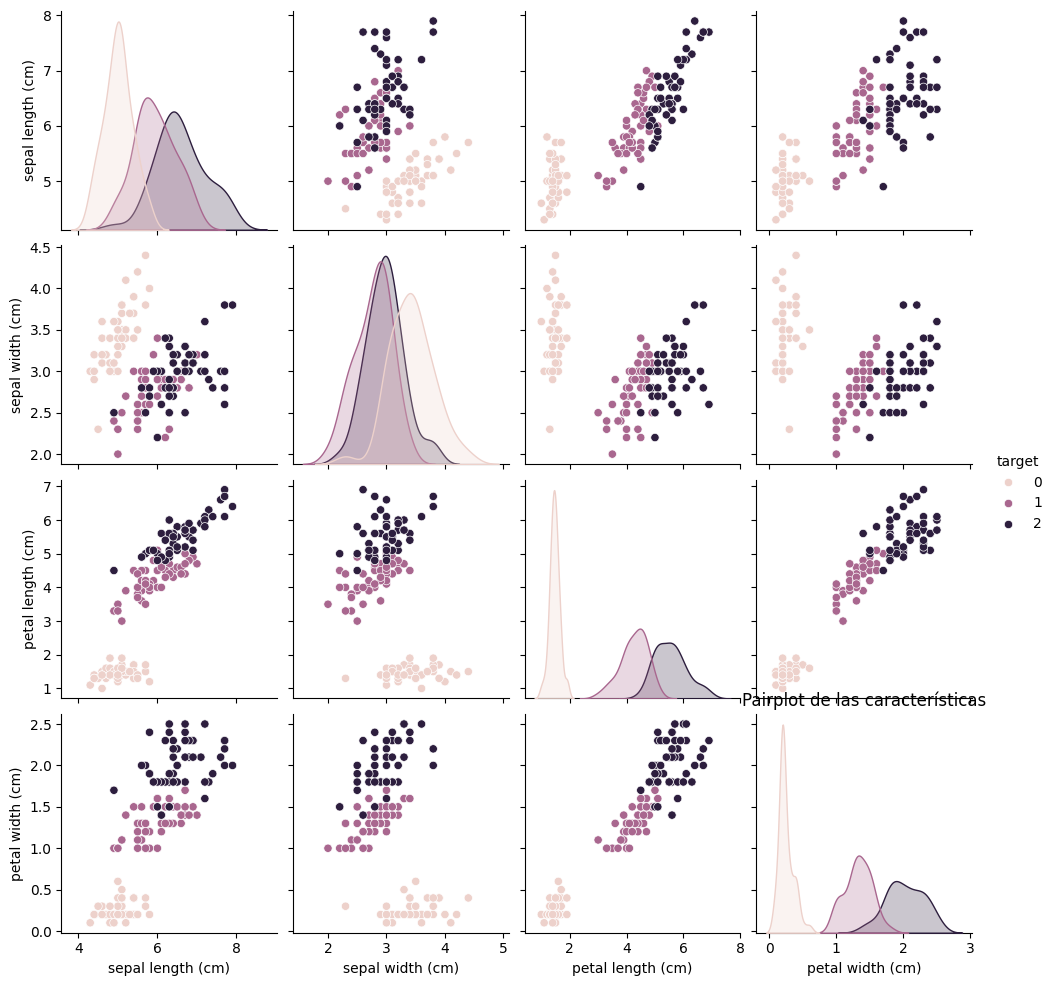

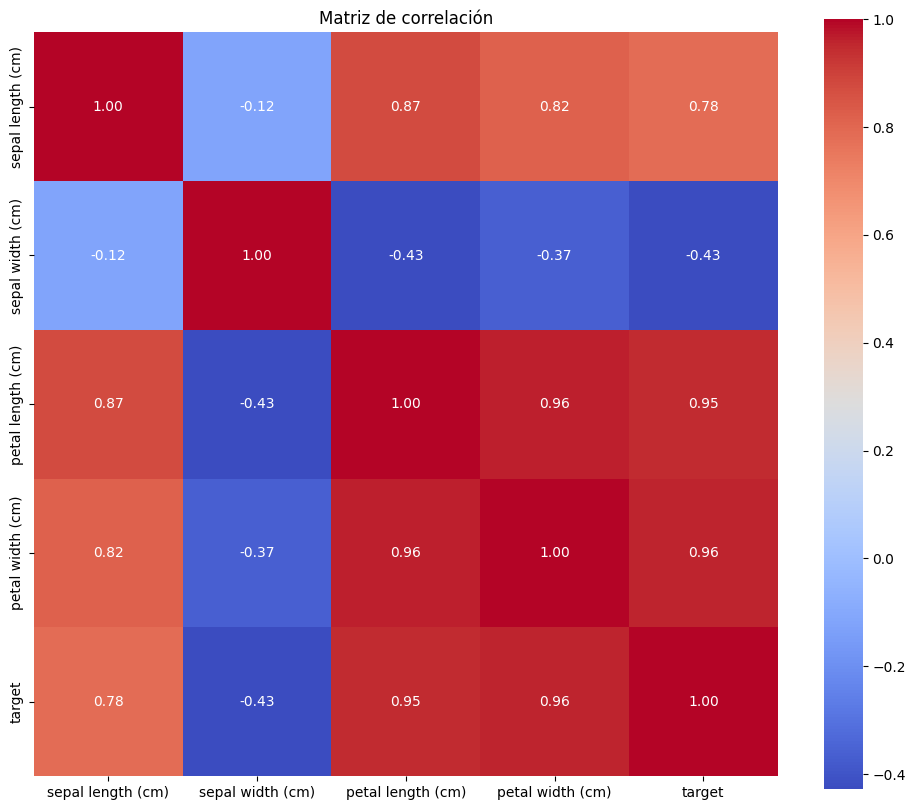

Precisión promedio con validación cruzada: 0.96

Matriz de confusión:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



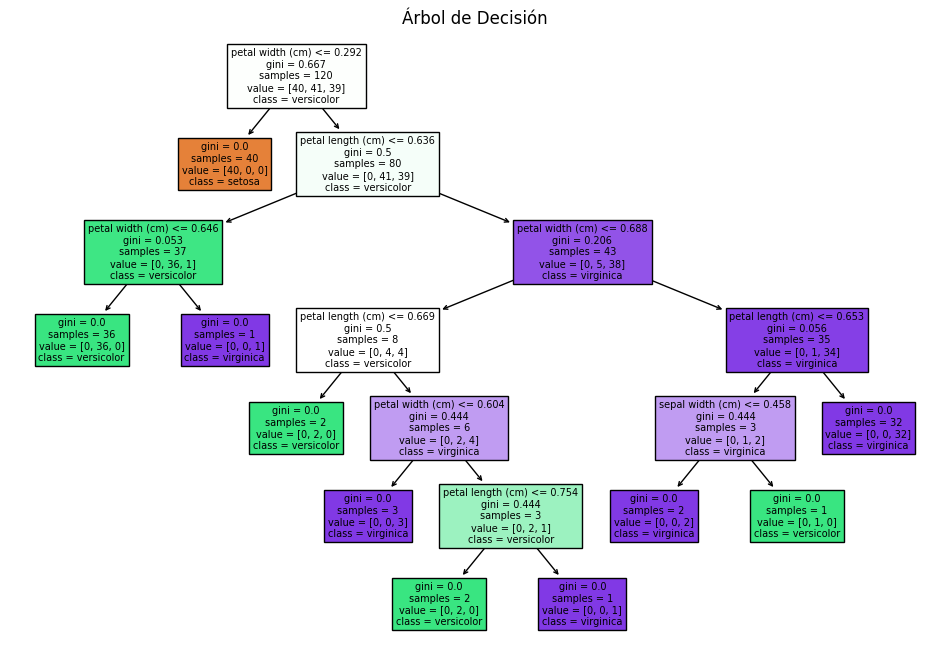

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Convertir a DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Análisis exploratorio de datos (EDA)
# Histogramas
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histogramas de las características')
plt.show()

# Gráficos de caja
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop('target', axis=1))
plt.title('Gráficos de caja de las características')
plt.xticks(rotation=45)
plt.show()

# Gráficos de densidad
plt.figure(figsize=(15, 10))
for feature in feature_names:
    sns.kdeplot(df[feature], label=feature, fill=True)
plt.title('Gráficos de densidad de las características')
plt.legend()
plt.show()

# Pairplot
sns.pairplot(df, hue='target')
plt.title('Pairplot de las características')
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de correlación')
plt.show()

# Escalado de características
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Algoritmo de árbol de decisión
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Validación cruzada
cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print(f'Precisión promedio con validación cruzada: {np.mean(cv_scores):.2f}')

# Predicciones y métricas de clasificación
y_pred = model.predict(X_test)
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

# Visualización del árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=feature_names, class_names=iris.target_names, filled=True)
plt.title('Árbol de Decisión')
plt.show()
